<a href="https://colab.research.google.com/github/SidddhantJain/Machine-Learning-Lab/blob/main/ML_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


100%|██████████| 7.20M/7.20M [00:00<00:00, 97.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vijayuv/onlineretail/versions/1


In [46]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:

# Load data
df = pd.read_csv('/content/OnlineRetail.csv', encoding='latin-1') # or 'ISO-8859-1', or any other suitable encoding




In [48]:

# Drop missing values in Description and InvoiceNo
df.dropna(subset=['InvoiceNo', 'Description'], inplace=True)

# Convert to string (just in case)
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['Description'] = df['Description'].astype(str)

# Group by InvoiceNo to get itemsets (transactional format)
transactions = df.groupby('InvoiceNo')['Description'].apply(list).values.tolist()


In [49]:

# Transaction Encoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Apply Apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)


In [50]:

# Association Rules
if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    if not rules.empty:
        # Metrics
        avg_conf = rules['confidence'].mean()
        avg_lift = rules['lift'].mean()
        num_rules = len(rules)

        print(f"📊 Total Rules: {num_rules}")
        print(f"🔐 Avg. Confidence: {avg_conf:.2f}")
        print(f"🚀 Avg. Lift: {avg_lift:.2f}")


📊 Total Rules: 1992
🔐 Avg. Confidence: 0.46
🚀 Avg. Lift: 22.04


<ipython-input-54-2cbe8a73cf14>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_itemsets, y='itemset', x='support', palette='crest')


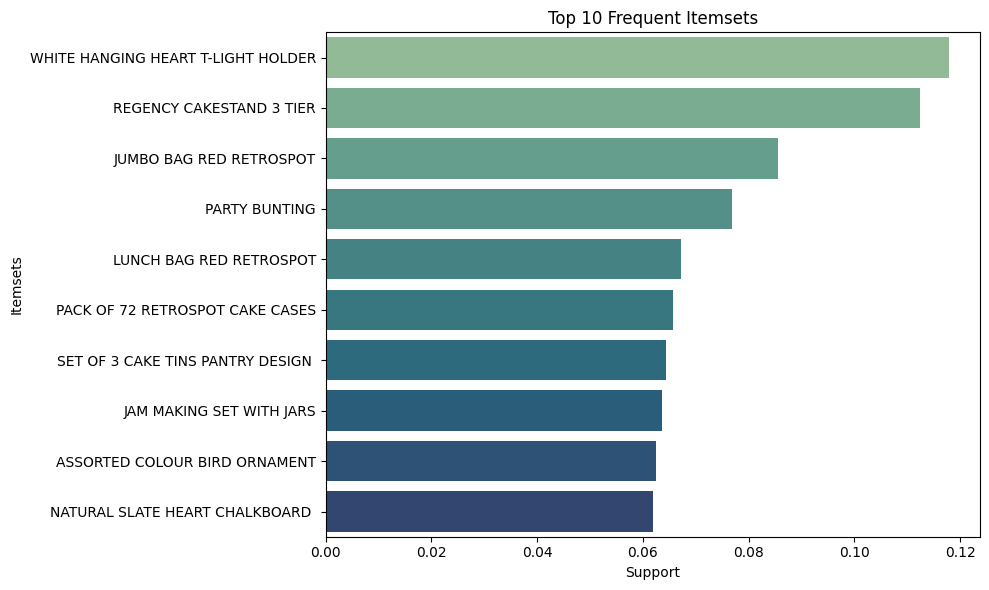

<ipython-input-54-2cbe8a73cf14>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rules, y='rule', x='lift', palette='coolwarm')


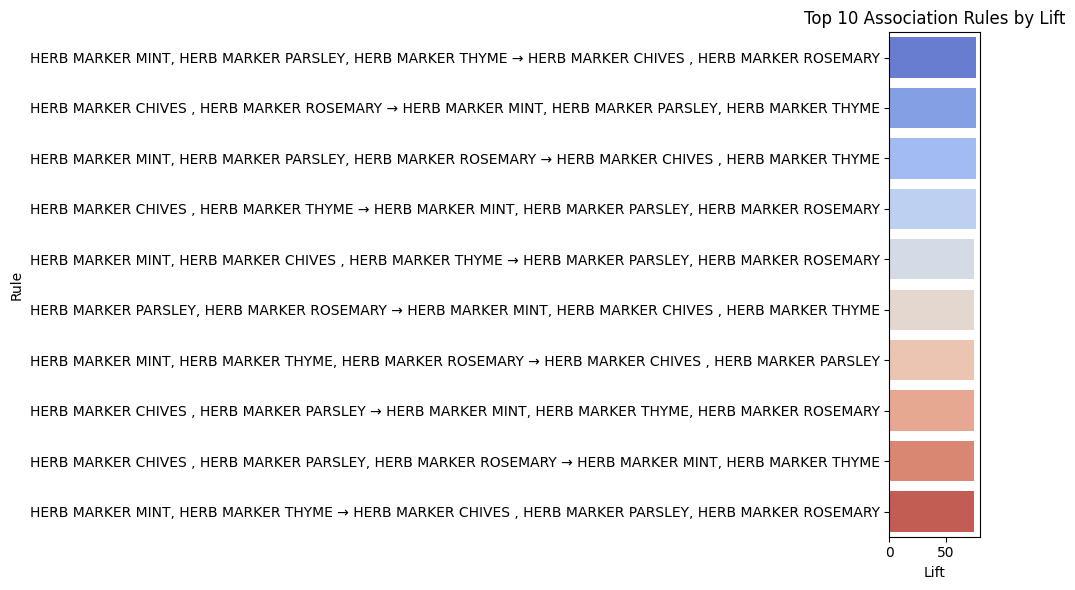

In [54]:
# Top Frequent Itemsets
top_itemsets = frequent_itemsets.nlargest(10, 'support')
top_itemsets['itemset'] = top_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

plt.figure(figsize=(10,6))
sns.barplot(data=top_itemsets, y='itemset', x='support', palette='crest')
plt.title("Top 10 Frequent Itemsets")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.tight_layout()
plt.show()

        # Top Rules by Lift
top_rules = rules.nlargest(10, 'lift')
top_rules['rule'] = top_rules.apply(lambda x: f"{', '.join(list(x['antecedents']))} → {', '.join(list(x['consequents']))}", axis=1)

plt.figure(figsize=(10,6))
sns.barplot(data=top_rules, y='rule', x='lift', palette='coolwarm')
plt.title("Top 10 Association Rules by Lift")
plt.xlabel("Lift")
plt.ylabel("Rule")
plt.tight_layout()
plt.show()
